In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats


In [2]:
from sklearn.datasets import make_blobs


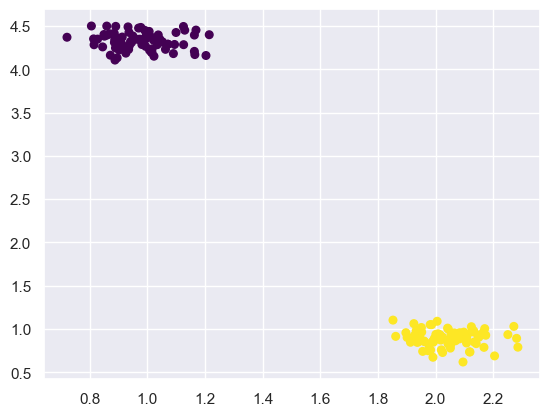

In [3]:
X,y=make_blobs(n_samples=150,centers=2,cluster_std=.10,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='viridis')


In [4]:
X[:10]

array([[2.13390032, 0.85102175],
       [1.07099528, 4.28828632],
       [0.98084593, 4.28506894],
       [1.02283632, 4.15016296],
       [2.0241789 , 0.90740368],
       [1.92598183, 0.92436875],
       [0.99176482, 4.34160358],
       [0.99401269, 4.26360923],
       [2.20471598, 0.69066516],
       [0.94147886, 4.31942222]])

In [5]:
y[:10]

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

(-1.0, 5.0)

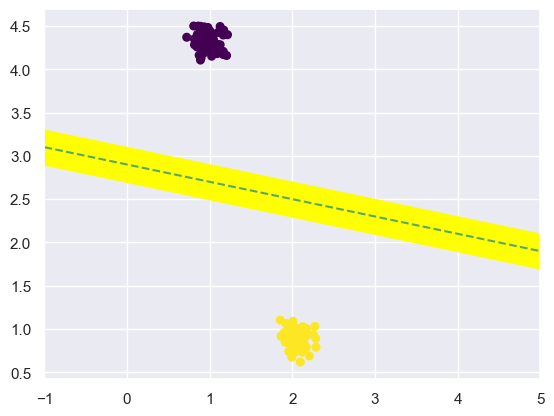

In [6]:
Xfit=np.linspace(-1,5.0)

plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='viridis')

for m,b,d in [(-0.2,2.9,0.2)]:
    yfit=m*Xfit+b # y=mx+b
    
    plt.plot(Xfit,yfit,'--g')
    
    plt.fill_between(Xfit,yfit-d,yfit+d,color='yellow',alpha=1)
    
plt.xlim(-1,5.0)

In [7]:
Xfit

array([-1.        , -0.87755102, -0.75510204, -0.63265306, -0.51020408,
       -0.3877551 , -0.26530612, -0.14285714, -0.02040816,  0.10204082,
        0.2244898 ,  0.34693878,  0.46938776,  0.59183673,  0.71428571,
        0.83673469,  0.95918367,  1.08163265,  1.20408163,  1.32653061,
        1.44897959,  1.57142857,  1.69387755,  1.81632653,  1.93877551,
        2.06122449,  2.18367347,  2.30612245,  2.42857143,  2.55102041,
        2.67346939,  2.79591837,  2.91836735,  3.04081633,  3.16326531,
        3.28571429,  3.40816327,  3.53061224,  3.65306122,  3.7755102 ,
        3.89795918,  4.02040816,  4.14285714,  4.26530612,  4.3877551 ,
        4.51020408,  4.63265306,  4.75510204,  4.87755102,  5.        ])

In [8]:
#SVM - Maximum margin estimation
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1E10)
model.fit(X,y)


SVC(C=10000000000.0, kernel='linear')

In [9]:
def svcplot(model,ax=None,plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    ax.contour(X,Y,P,colors='b',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],
                  s=20,linewidth=1,facecolors='red')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)


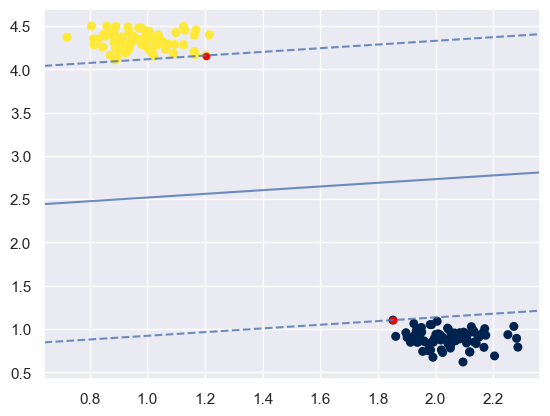

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='cividis_r')
svcplot(model)# function call - driver code


In [11]:
model.support_vectors_

array([[1.20324554, 4.15835076],
       [1.85219907, 1.10411295]])

# SVM Non-linear


In [12]:
from sklearn.datasets import make_circles

In [13]:
X,y=make_circles(100,noise=0.2,factor=0.12)
clf=SVC(kernel='rbf').fit(X,y)

In [14]:
y[:10]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [15]:
X[:10]

array([[ 0.87373594,  0.88666002],
       [-0.17317488,  0.66971638],
       [-0.19140565,  0.25280665],
       [ 0.95506042,  0.26258872],
       [-0.09005103, -0.01427353],
       [-0.60133443, -0.46305867],
       [ 1.04850397, -0.64869404],
       [-1.05467467,  0.49698072],
       [ 0.21536424, -0.94666332],
       [-0.17839984, -0.13070656]])

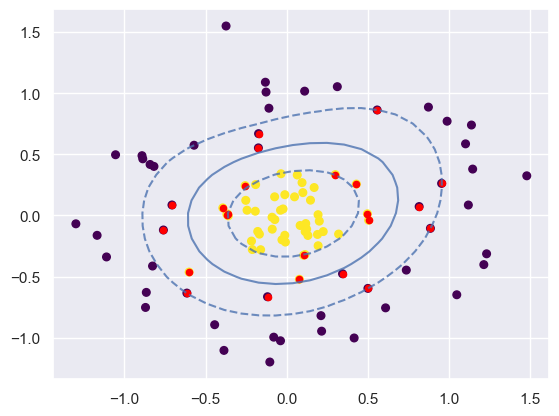

In [16]:
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='viridis')
svcplot(clf,plot_support=True)

In [17]:
r=np.exp(-(X**2).sum(1))
r[:10]

array([0.21233703, 0.61970634, 0.90434231, 0.37490102, 0.99172153,
       0.56212759, 0.21867591, 0.25683319, 0.38963176, 0.95226616])

In [18]:
from mpl_toolkits import mplot3d

def plot3D(elev=30,azim=30,X=X,y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=30,cmap='viridis')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    

In [19]:
# interact(plot3D,elev=[-90,90],azim=(-180,180),X=fixed(X),y=fixed(y))

In [22]:
clf=SVC(kernel='rbf',C=1E4)
clf.fit(X,y)

SVC(C=10000.0)

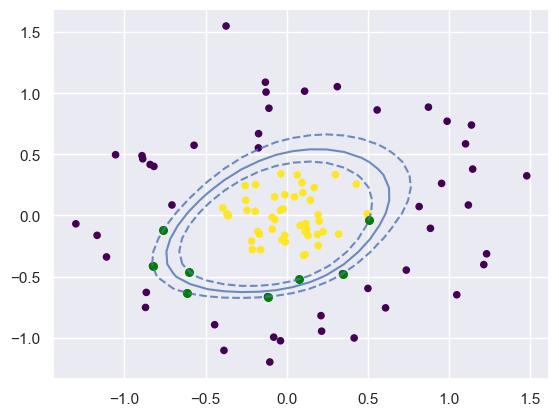

In [23]:
plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap='viridis')
svcplot(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=30,lw=1,facecolors="green")

# Face Recognition


In [45]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60) # put 60 instead of 30
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [46]:
faces.images.shape

(1348, 62, 47)

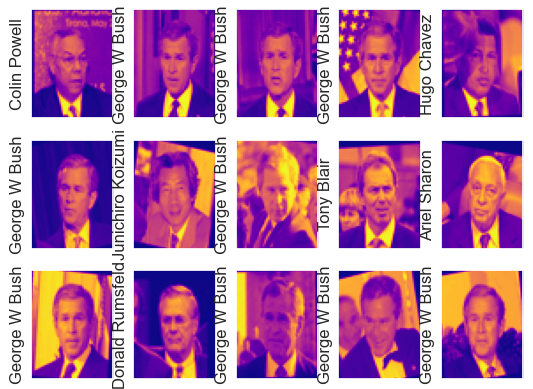

In [47]:
fig,ax=plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='plasma')
    axi.set(xticks=[],yticks=[],ylabel=faces.target_names[faces.target[i]])

In [48]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca=RandomizedPCA(n_components=150,random_state=62,whiten=True)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [49]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=62)

In [50]:
Xtest.shape

(337, 2914)

In [51]:
Xtrain.shape

(1011, 2914)

In [54]:
from sklearn.model_selection import GridSearchCV
paramgrid={'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,paramgrid)
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

CPU times: total: 1min 50s
Wall time: 28.6 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [55]:
model=grid.best_estimator_
yfit=model.predict(Xtest)

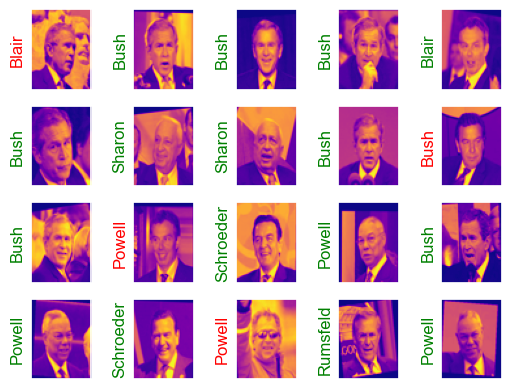

In [56]:
fig,ax=plt.subplots(4,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='plasma')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='green' if yfit[i]==ytest[i] else 'red')
    
    
    
    

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(ytest,yfit,target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.71      0.77        21
     Colin Powell       0.83      0.83      0.83        64
  Donald Rumsfeld       0.72      0.64      0.68        33
    George W Bush       0.77      0.90      0.83       118
Gerhard Schroeder       0.71      0.65      0.68        31
      Hugo Chavez       0.64      0.39      0.48        18
Junichiro Koizumi       1.00      0.73      0.85        15
       Tony Blair       0.62      0.65      0.63        37

         accuracy                           0.76       337
        macro avg       0.77      0.69      0.72       337
     weighted avg       0.76      0.76      0.76       337



In [35]:
mat=confusion_matrix(ytest,yfit)
mat

array([[ 15,   1,   0,   5,   0,   0,   0,   0],
       [  1,  53,   4,   5,   0,   0,   0,   1],
       [  0,   2,  21,   8,   0,   0,   0,   2],
       [  2,   5,   1, 106,   0,   0,   0,   4],
       [  0,   0,   1,   3,  20,   0,   0,   7],
       [  0,   1,   1,   2,   6,   7,   0,   1],
       [  0,   0,   0,   3,   0,   1,  11,   0],
       [  0,   2,   1,   5,   2,   3,   0,  24]], dtype=int64)

<Axes: >

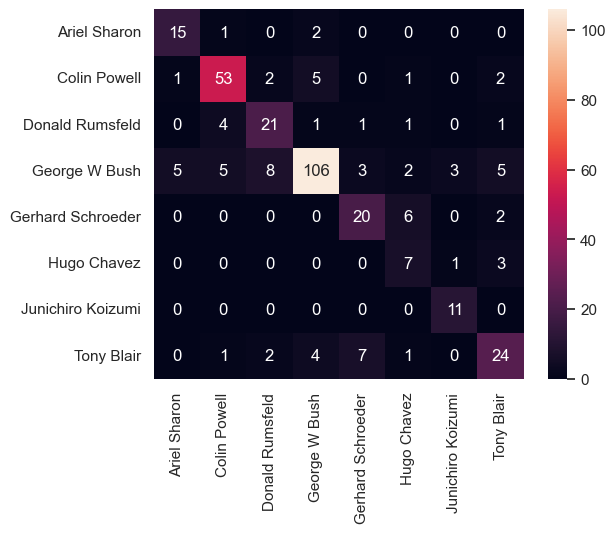

In [36]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=True,
           xticklabels=faces.target_names,yticklabels=faces.target_names)


In [37]:
accuracy_score(ytest,yfit)

0.7626112759643917